In [1]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_text

In [50]:
# Loading the dataset
data = pd.read_csv('data/weather_forecast.csv')
df = data.copy()
print(df.shape)
df

(14, 5)


,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [54]:
# Preprocess the data
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Windy'] = label_encoder.fit_transform(df['Windy'])
df['Play'] = label_encoder.fit_transform(df['Play'])

In [55]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [30]:
# Separate features (X) and target variable (y)
X = df.drop('Play', axis=1)
y = df['Play']

In [31]:
# Split the data into training and testing sets
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create a Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test)

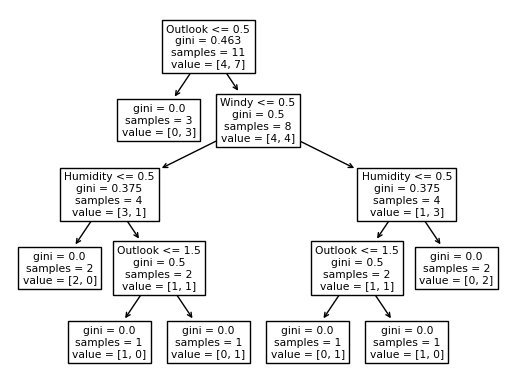

In [36]:
tree.plot_tree(decision_tree, feature_names=df.columns.to_list());

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [38]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [39]:
# Display the decision tree rules
tree_rules = export_text(decision_tree, feature_names=X.columns.tolist())
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Windy <= 0.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- class: 0
|   |   |--- Humidity >  0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |--- Windy >  0.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1



In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = random_forest.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)


Accuracy: 0.6666666666666666
Confusion Matrix:
[[1 0]
 [1 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [41]:
import pickle

In [42]:
pickle.dump(decision_tree, open('model.pkl','wb'))

In [52]:
# Dump the DataFrame to a file using pickle
with open('weather_data.pkl', 'wb') as file:
    pickle.dump(df, file)

In [49]:
!streamlit run app.py

^C
